In [10]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
df = pandas.read_csv("data.csv")

In [11]:
#initializing the decision tree values
d = {'Y': 1, 'N': 0}

df["Change"] = df["Change"].map(d)
df["Skip"] = df["Skip"].map(d)
df["Overtime"] = df["Overtime"].map(d)
df["Submit"] = df["Submit"].map(d)

########################################################

d = {'Relate': 1, 'Not Relate': 0}
df["Lable"] = df["Lable"].map(d)


In [12]:
features = ["Score" , "Change", "Skip", "Overtime", "Submit", "Worry", "Sad", "Happy", "Natural"]

x = df[features]
y = df["Lable"]

In [13]:
data_test = df.copy()

In [14]:
# Finding the best random state from 1 to 100 and test size from 0.10 to 0.90
results = []
for i in range(1, 100):
    for j in range(10, 90):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=j/100, random_state=i)
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results.append(
            {
                "random_state": i,
                "test_size": j/100,
                "accuracy": accuracy_score(y_test, y_pred),
                "train_test_split": {
                    "X_train": X_train,
                    "X_test": X_test,
                    "y_train": y_train,
                    "y_test": y_test,
                },
                "clf": clf,
                "y_pred": y_pred
            }
        )

# Finding the best accuracy from the results and get clf
max_accuracy = 0
best_result = None
for result in results:
    if result["accuracy"] > max_accuracy:
        max_accuracy = result["accuracy"]
        best_result = result

print("Accuracy: " + best_result["accuracy"])
print("Random State: " + best_result["random_state"])
print("Test Size: " + best_result["test_size"])

Best Random State:  10
Best Test Size:  0.32
Accuracy:  1.0


Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.90      0.82      0.86        11

    accuracy                           0.82        17
   macro avg       0.81      0.83      0.81        17
weighted avg       0.83      0.82      0.83        17



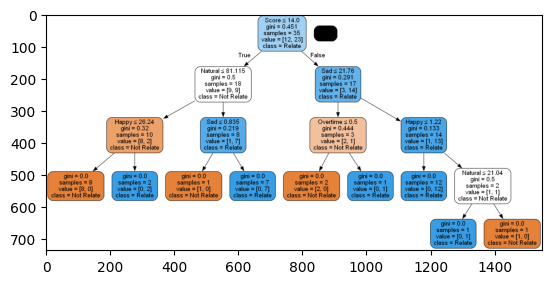

In [15]:
# Use best_result to get clf
clf = best_result["clf"]

# Calculating the accuracy
print("Accuracy:", best_result["accuracy"])

# Calculating the classification report
print(classification_report(best_result["y_test"], best_result["y_pred"]))

# Plotting the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=[
                                "Not Relate", "Relate"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
img = pltimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()

# Predicting the values for the whole data
y_pred = clf.predict(x)

# Adding the predicted values to the data
data_test["Predicted"] = y_pred

# Saving the data to a csv file
data_test.to_csv("data_test.csv", index=False)

# Saving the decision tree to a png file
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=[
                                "Not Relate", "Relate"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# Saving the decision tree to a pdf file
graph.write_pdf("tree.pdf")

# Saving the decision tree to a dot file
tree.export_graphviz(clf, out_file='tree.dot', feature_names=features, class_names=[
                     "Not Relate", "Relate"], filled=True, rounded=True, special_characters=True)


In [16]:
print("Best Random State: ", best_random_state)
print("Best Test Size: ", best_test_size)

Best Random State:  10
Best Test Size:  0.32


In [17]:
# Export DecisionTreeClassifier model to a pickle file
import pickle
pickle.dump(clf, open("model.pkl", "wb"))

# Load DecisionTreeClassifier model from a pickle file
clf = pickle.load(open("model.pkl", "rb"))

In [18]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<Score &le; 14.0<br/>gini = 0.451<br/>samples = 35<br/>value = [12, 23]<br/>class = Relate>, fillcolor="#a0d0f3"] ;\n1 [label=<Natural &le; 81.115<br/>gini = 0.5<br/>samples = 18<br/>value = [9, 9]<br/>class = Not Relate>, fillcolor="#ffffff"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<Happy &le; 26.24<br/>gini = 0.32<br/>samples = 10<br/>value = [8, 2]<br/>class = Not Relate>, fillcolor="#eca06a"] ;\n1 -> 2 ;\n3 [label=<gini = 0.0<br/>samples = 8<br/>value = [8, 0]<br/>class = Not Relate>, fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = Relate>, fillcolor="#399de5"] ;\n2 -> 4 ;\n5 [label=<Sad &le; 0.835<br/>gini = 0.219<br/>samples = 8<br/>value = [1, 7]<br/>class = Relate>, fillcolor="#55abe9"] ;\n1 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0]